# **NoteBook 03**
*   Name: C N S Peiris
*   UOWno: W2054006
*   IIT no: 20232308
*   Reviewer: Pahandi Samarasinghe






# **Ensemble Models**

Codereuse Session 03 (Week 11) Question 01, 06, 08

In [1]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import GridSearchCV, train_test_split  # For splitting data
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.ensemble import VotingClassifier  # Ensemble voting classifier
from sklearn import metrics  # For model evaluation metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
                            classification_report, RocCurveDisplay)  # Specific metric

Codereuse Session 03 (Week 11) Question 02

In [2]:
# Load cleaned classification dataset
data_class = pd.read_csv('/content/drive/MyDrive/BrestCancer/cleaned_classification_data.csv')

In [3]:
# Check dataset shape
data_class.shape

(4018, 14)

Codereuse Session 03 (Week 11) Question 03

In [4]:
# Display first 5 rows
data_class.head()

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
0,68,0,0,0,0,3,0,4,1,1,24,1,60,0
1,50,1,1,1,1,2,0,35,1,1,14,5,62,0
2,58,2,2,2,1,2,0,63,1,1,14,7,75,0
3,58,0,0,0,0,3,0,18,1,1,2,1,84,0
4,47,1,0,3,0,3,0,41,1,1,3,1,50,0


Codereuse Session 03 (Week 11) Question 04

In [5]:
# Get dataset information including column types and non-null counts
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4018 non-null   int64
 1   T_Stage                 4018 non-null   int64
 2   N_Stage                 4018 non-null   int64
 3   6th_Stage               4018 non-null   int64
 4   Differentiated          4018 non-null   int64
 5   Grade                   4018 non-null   int64
 6   A_Stage                 4018 non-null   int64
 7   Tumor_Size              4018 non-null   int64
 8   Estrogen_Status         4018 non-null   int64
 9   Progesterone_Status     4018 non-null   int64
 10  Regional_Node_Examined  4018 non-null   int64
 11  Regional_Node_Positive  4018 non-null   int64
 12  Survival_Months         4018 non-null   int64
 13  Mortality_Status        4018 non-null   int64
dtypes: int64(14)
memory usage: 439.6 KB


Codereuse Session 03 (Week 11) Question 05

In [6]:
# Define features and target for classification task
feature_cols_class = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                      'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
                      'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months']

X_class = data_class[feature_cols_class]  # Features
y_class = data_class['Mortality_Status']  # Target variable

print("Features shape:", X_class.shape)  # Print shape of feature matrix
print("Target shape:", y_class.shape)   # Print shape of target vector


Features shape: (4018, 13)
Target shape: (4018,)


Codereuse Session 03 (Week 11) Question 07

In [7]:
# Split data for classification (stratified)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

print("Training set shape:", X_train_class.shape)
print("Testing set shape:", X_test_class.shape)


Training set shape: (3214, 13)
Testing set shape: (804, 13)


Codereuse Session 02 (Week 07) Question 25

In [ ]:
# Hyperparameter Tuning LR
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(), lr_params, cv=5, scoring='f1')
grid_lr.fit(X_train_class, y_train_class)

Codereuse Session 02 (Week 07) Question 26

In [ ]:
y_pred_lr_tuned = grid_lr.predict(X_test_class)

Codereuse Session 02 (Week 07) Question 25,26

In [ ]:
# Hyperparameter KNN
import numpy as np
param_grid = {
    'n_neighbors': np.arange(1, 25),
    'metric': ['euclidean', 'manhattan']
    }

# Find the best fitting model with pre defined K values
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the test data to the optimized model
knn_gscv.fit(X_train_class,y_train_class)


Codereuse Session 02 (Week 07) Question 16

In [8]:
print("Best KNN Parameters:", knn_gscv.best_params_)
#Prediction using best model with the best accuracy
y_pred_knn_tuned = knn_gscv.predict(X_test_class)
print("Best KNN Test Accuracy:", accuracy_score(y_test_class, y_pred_knn_tuned))

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': np.int64(13)}
Best KNN Test Accuracy: 0.8868159203980099


Codereuse Session 02 (Week 07) Question 18

In [9]:
print("="*50)
print("Tunned LR:")
print("="*50)
print(classification_report(y_test_class, y_pred_lr_tuned))

Tunned LR:
              precision    recall  f1-score   support

           0       0.91      0.97      0.93       681
           1       0.70      0.44      0.54       123

    accuracy                           0.89       804
   macro avg       0.80      0.70      0.74       804
weighted avg       0.87      0.89      0.87       804



Codereuse Session 02 (Week 07) Question 17

Tunned LR:


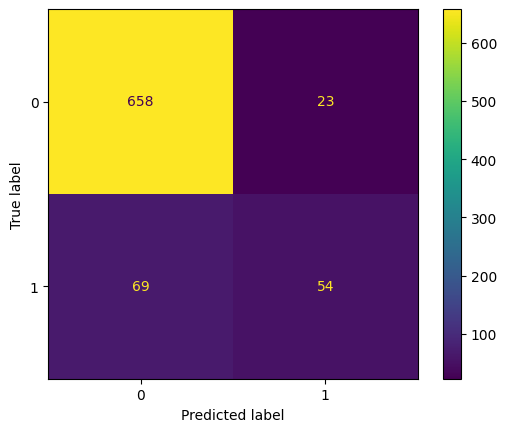

In [10]:
# Confusion Matrix
print("="*50)
print("Tunned LR:")
print("="*50)
ensemble_cm = confusion_matrix(y_test_class, y_pred_lr_tuned)
ensemble_disp = ConfusionMatrixDisplay(confusion_matrix=ensemble_cm)
ensemble_disp.plot()

Codereuse Session 02 (Week 07) Question 19

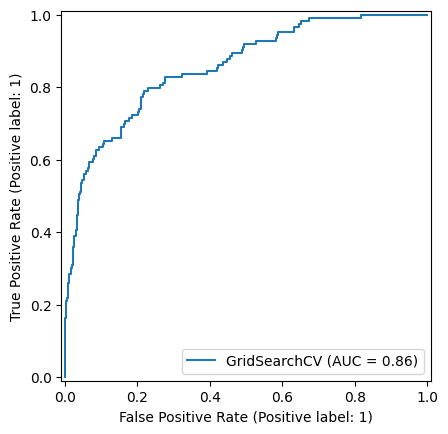

In [11]:
RocCurveDisplay.from_estimator(grid_lr, X_test_class, y_test_class)

Codereuse Session 02 (Week 07) Question 18

In [12]:
print("="*50)
print("Tunned KNN:")
print("="*50)
print(classification_report(y_test_class, y_pred_knn_tuned))

Tunned KNN:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       681
           1       0.74      0.41      0.52       123

    accuracy                           0.89       804
   macro avg       0.82      0.69      0.73       804
weighted avg       0.88      0.89      0.87       804



Codereuse Session 02 (Week 07) Question 17

Tunned KNN:


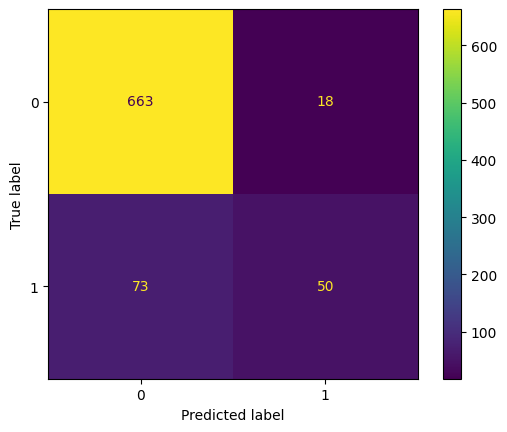

In [13]:
# Confusion Matrix
print("="*50)
print("Tunned KNN:")
print("="*50)
ensemble_cm = confusion_matrix(y_test_class, y_pred_knn_tuned)
ensemble_disp = ConfusionMatrixDisplay(confusion_matrix=ensemble_cm)
ensemble_disp.plot()

Codereuse Session 02 (Week 07) Question 19

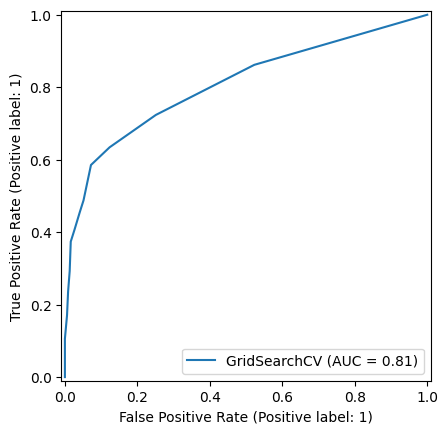

In [14]:
#ROC Curve of optimized K-Nearest neighbors model
RocCurveDisplay.from_estimator(knn_gscv, X_test_class, y_test_class)

Codereuse Session 03 (Week 11) Question 09

In [15]:
# Define two base learners for ensemble
clf1 = grid_lr  # L1-regularized Logistic Regression
clf2 = knn_gscv   # KNN with Manhattan distance


Codereuse Session 03 (Week 11) Question 09

In [16]:
# Create Voting Classifier (soft voting)
ensemble_learner = VotingClassifier(estimators=[('LR', clf1), ('KNN', clf2)], voting = 'soft')


Codereuse Session 03 (Week 11) Question 10

In [17]:
# Train the ensemble learner
ensemble_learner.fit(X_train_class, y_train_class)

VotingClassifier(estimators=[('LR',
                              GridSearchCV(cv=5, estimator=LogisticRegression(),
                                           param_grid={'C': [0.001, 0.01, 0.1,
                                                             1, 10],
                                                       'penalty': ['l1', 'l2'],
                                                       'solver': ['liblinear']},
                                           scoring='f1')),
                             ('KNN',
                              GridSearchCV(cv=5,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'metric': ['euclidean',
                                                                  'manhattan'],
                                                       'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])}))],
                 voting='soft')

Codereuse Session 03 (Week 11) Question 11

In [18]:
# Make predictions on test data
y_pred_ensemble = ensemble_learner.predict(X_test_class)        # Class predictions

Codereuse Session 03 (Week 11) Question 12

In [19]:
# Accuracy
ensemble_accuracy = accuracy_score(y_test_class, y_pred_ensemble)
print("Voting Ensemble Classifier Accuracy:", ensemble_accuracy)

Voting Ensemble Classifier Accuracy: 0.8868159203980099


Codereuse Session 03 (Week 11) Question 14

In [20]:
# Classification Report
print("Classification Report for Ensemble Learner:\n", classification_report(y_test_class, y_pred_ensemble))

Classification Report for Ensemble Learner:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       681
           1       0.70      0.46      0.55       123

    accuracy                           0.89       804
   macro avg       0.80      0.71      0.74       804
weighted avg       0.88      0.89      0.88       804



Codereuse Session 03 (Week 11) Question 13

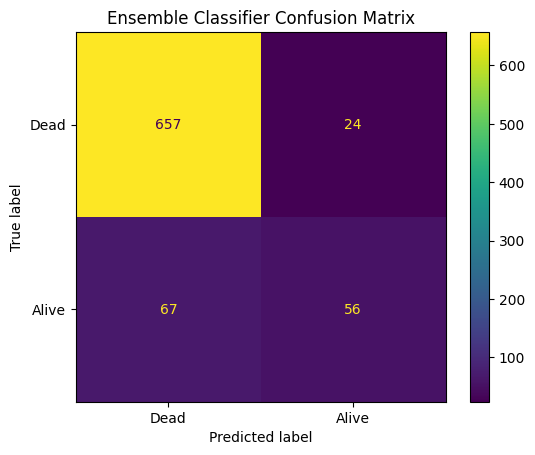

In [21]:

# Confusion Matrix
ensemble_cm = confusion_matrix(y_test_class, y_pred_ensemble)
ensemble_disp = ConfusionMatrixDisplay(confusion_matrix=ensemble_cm, display_labels=['Dead', 'Alive'])
ensemble_disp.plot()
plt.title("Ensemble Classifier Confusion Matrix")
plt.show()


Codereuse Session 03 (Week 11) Question 15

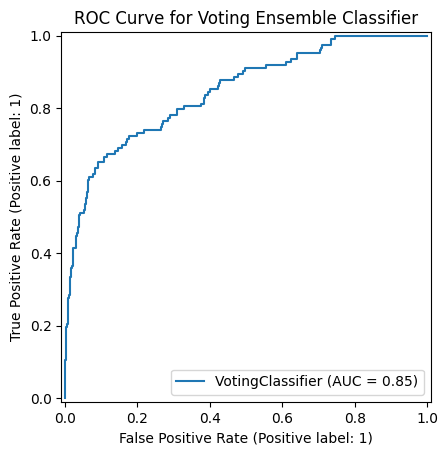

In [22]:
# ROC Curve
RocCurveDisplay.from_estimator(ensemble_learner, X_test_class, y_test_class)
plt.title("ROC Curve for Voting Ensemble Classifier")
plt.show()


# **DecisionTrees**

Codereuse Session 03 (PART 2) (Week 11) Question 06, 10

In [23]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree

Codereuse Session 03 (PART 2) (Week 11) Question 01

In [24]:
# Load cleaned regression dataset
data_reg = pd.read_csv('/content/drive/MyDrive/BrestCancer/cleaned_regression_data.csv')

Codereuse Session 03 (PART 2) (Week 11) Question 02

In [25]:
# Get dataset information
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     615 non-null    int64
 1   T_Stage                 615 non-null    int64
 2   N_Stage                 615 non-null    int64
 3   6th_Stage               615 non-null    int64
 4   Differentiated          615 non-null    int64
 5   Grade                   615 non-null    int64
 6   A_Stage                 615 non-null    int64
 7   Tumor_Size              615 non-null    int64
 8   Estrogen_Status         615 non-null    int64
 9   Progesterone_Status     615 non-null    int64
 10  Regional_Node_Examined  615 non-null    int64
 11  Regional_Node_Positive  615 non-null    int64
 12  Survival_Months         615 non-null    int64
dtypes: int64(13)
memory usage: 62.6 KB


Codereuse Session 03 (PART 2) (Week 11) Question 04

In [26]:
# Define features and target for regression task
feature_cols_reg =  [
    'Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
    'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
    'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Examined'
]
X_reg = data_reg[feature_cols_reg]  # Features
y_reg = data_reg['Survival_Months']  # Target variable (continuous)

print('\n'.join(X_reg.columns))
print("\n")
print("Features shape (regression):", X_reg.shape)


Age
T_Stage
N_Stage
6th_Stage
Differentiated
Grade
A_Stage
Tumor_Size
Estrogen_Status
Progesterone_Status
Regional_Node_Examined
Regional_Node_Examined


Features shape (regression): (615, 12)


Codereuse Session 03 (PART 2) (Week 11) Question 05

In [27]:
# Split regression data into train and test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Training set shape (regression):", X_train_reg.shape)
print("Testing set shape (regression):", X_test_reg.shape)


Training set shape (regression): (492, 12)
Testing set shape (regression): (123, 12)


Codereuse Session 03 (PART 2) (Week 11) Question 0\

In [28]:

# Create and train a fully grown decision tree regressor (no pruning)
dt_full = DecisionTreeRegressor(random_state=42)  # Using default parameters
dt_full.fit(X_train_reg, y_train_reg)  # Train on training data


DecisionTreeRegressor(random_state=42)

Codereuse Session 03 (PART 2) (Week 11) Question 08

In [29]:
# Predictions on test dats
y_pred_full = dt_full.predict(X_test_reg)

Codereuse Session 03 (PART 2) (Week 11) Question 09

In [30]:
# Evaluate the fully grown tree using regression metrics
print("Fully Grown Tree Metrics:")
print("MAE:", metrics.mean_absolute_error(y_test_reg, y_pred_full))  # Mean Absolute Error
print("MSE:", metrics.mean_squared_error(y_test_reg, y_pred_full))   # Mean Squared Error
print("R2 Score:", metrics.r2_score(y_test_reg, y_pred_full))        # R-squared


Fully Grown Tree Metrics:
MAE: 28.910569105691057
MSE: 1312.5365853658536
R2 Score: -1.4650271027570998


Codereuse Session 03 (PART 2) (Week 11) Question 11

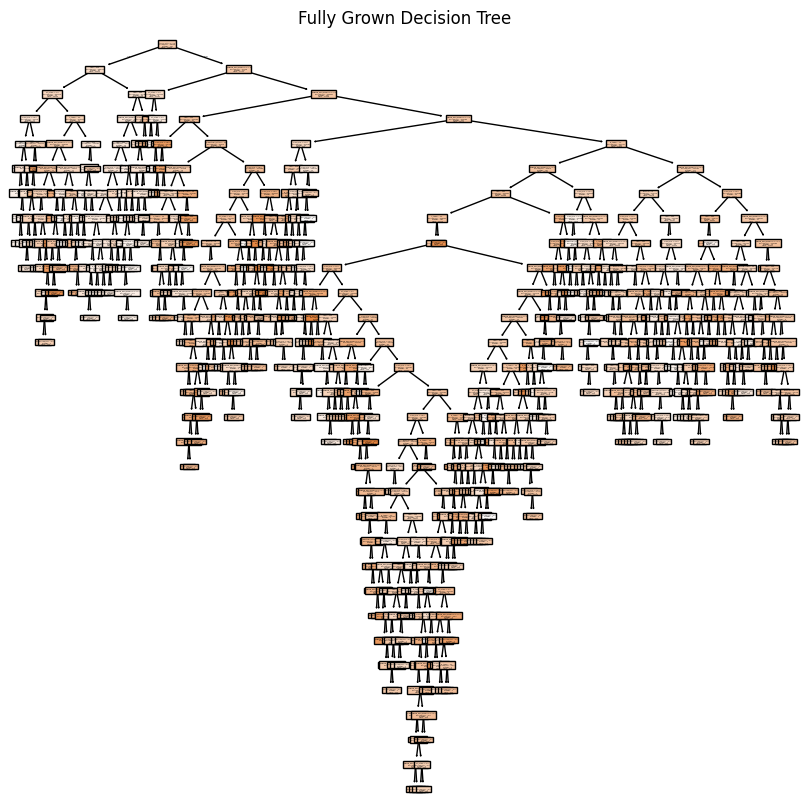

In [31]:

# Plot the full decision tree
plt.figure(figsize=(100,100))
dt_full_tree=tree.plot_tree(dt_full, feature_names=feature_cols_reg, filled=True)
plt.title("Fully Grown Decision Tree")
plt.show()


Codereuse Session 03 (PART 2) (Week 11) Question 12

In [32]:
# Save the tree visualization to file
plt.savefig("BrestCancer_decistion_tree.svg")

<Figure size 640x480 with 0 Axes>

Codereuse Session 03 (PART 2) (Week 11) Question 13

In [33]:
# Create and train a pruned decision tree regressor (max_depth=4)
dt_pruned = DecisionTreeRegressor(max_depth=4, random_state=42)  # Limited depth
dt_pruned.fit(X_train_reg, y_train_reg)  # Train on training data

# Make predictions with pruned tree
y_pred_pruned = dt_pruned.predict(X_test_reg)


Codereuse Session 03 (PART 2) (Week 11) Question 09

In [38]:

# Evaluation Metrics
print("Pruned Tree Metrics:")
print("MAE:", metrics.mean_absolute_error(y_test_reg, y_pred_pruned))
print("MSE:", metrics.mean_squared_error(y_test_reg, y_pred_pruned))
print("R2 Score:", metrics.r2_score(y_test_reg, y_pred_pruned))

# Plot the pruned decision tree
plt.figure(figsize=(100,100))
dt=tree.plot_tree(dt_pruned, feature_names=feature_cols_reg, filled=True)
plt.title("Pruned Decision Tree (Max Depth = 4)")
plt.show()


Pruned Tree Metrics:
MAE: 19.71416633325435
MSE: 586.6444835792645
R2 Score: -0.10175561415131762
